Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Read in Dataset

In [2]:
seasonstats_df = pd.read_csv(r'Data\seasonstats.csv')


Add previous year stats to each row

In [8]:
# What columns are in seasonstats_df
seasonstats_df.columns
# Currently, all stats are for the current season

Index(['Unnamed: 0', 'Season', 'Squad', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'Sh',
       'SoT', 'FK', 'PK', 'Cmp', 'Att', 'Cmp%', 'CK', 'CrdY', 'CrdR', 'Fls',
       'PKcon', 'OG'],
      dtype='object')

In [9]:
# Make a copy of the dataframe
seasonstats_shifted_df = seasonstats_df.copy()

In [10]:
# Change season to increase by one year
seasonstats_shifted_df['Season'] = seasonstats_shifted_df['Season'].apply(lambda x: f"{int(x[:4]) + 1}/{int(x[:4]) + 2}")

In [15]:
# Ensure number of rows have stayed the same
seasonstats_shifted_df.shape

(2563, 22)

In [16]:
# left merge on original dataframe to retain all data
seasonstats_merged = seasonstats_df.merge(seasonstats_shifted_df, on=['Squad', 'Season'],
                                          suffixes=('', '_prev'), how = 'left')

In [18]:
# Ensure number of rows have stayed the same
seasonstats_merged.shape

(2563, 42)

In [25]:
# ALl rows are retained with previous years stats included
seasonstats_merged

,Unnamed: 0,Season,Squad,W,D,L,GF,GA,Pts,Sh,...,PK_prev,Cmp_prev,Att_prev,Cmp%_prev,CK_prev,CrdY_prev,CrdR_prev,Fls_prev,PKcon_prev,OG_prev
0,0,2023/2024,Manchester City,28,7,3,96,34,91,647.0,...,3.0,18281.0,21969.0,83.2,223.0,51.0,0.0,373.0,5.0,1.0
1,1,2023/2024,Arsenal,28,5,5,91,29,89,511.0,...,3.0,13782.0,17396.0,79.2,162.0,80.0,1.0,417.0,6.0,4.0
2,2,2023/2024,Liverpool,24,10,4,86,41,82,539.0,...,6.0,19210.0,22888.0,83.9,233.0,58.0,0.0,427.0,8.0,6.0
3,3,2023/2024,Aston Villa,20,8,10,76,61,68,470.0,...,1.0,13395.0,17308.0,77.4,186.0,82.0,3.0,446.0,4.0,3.0
4,4,2023/2024,Tottenham,20,6,12,74,61,66,555.0,...,3.0,11790.0,15783.0,74.7,174.0,81.0,2.0,396.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,7,1888/1889,Everton,9,2,11,35,46,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2559,8,1888/1889,Burnley,7,3,12,42,62,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,9,1888/1889,Derby County,7,2,13,41,61,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,10,1888/1889,Notts County,5,2,15,40,73,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Check number of null values
is_missing = seasonstats_merged.isna()
missing_per_column = is_missing.sum(axis = 0)
display(missing_per_column)

Unnamed: 0            0
Season                0
Squad                 0
W                     0
D                     0
L                     0
GF                    0
GA                    0
Pts                   0
Sh                 2423
SoT                1917
FK                 2423
PK                 1917
Cmp                2423
Att                2423
Cmp%               2423
CK                 2423
CrdY               1917
CrdR               1937
Fls                2063
PKcon              2423
OG                 2423
Unnamed: 0_prev     346
W_prev              346
D_prev              346
L_prev              346
GF_prev             346
GA_prev             346
Pts_prev            346
Sh_prev            2461
SoT_prev           2031
FK_prev            2461
PK_prev            2031
Cmp_prev           2461
Att_prev           2461
Cmp%_prev          2461
CK_prev            2461
CrdY_prev          2031
CrdR_prev          2048
Fls_prev           2155
PKcon_prev         2461
OG_prev         

Clean the merged dataset

- Drop current year columns except for pts (target)

In [28]:
seasonstats_merged.columns

Index(['Unnamed: 0', 'Season', 'Squad', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'Sh',
       'SoT', 'FK', 'PK', 'Cmp', 'Att', 'Cmp%', 'CK', 'CrdY', 'CrdR', 'Fls',
       'PKcon', 'OG', 'Unnamed: 0_prev', 'W_prev', 'D_prev', 'L_prev',
       'GF_prev', 'GA_prev', 'Pts_prev', 'Sh_prev', 'SoT_prev', 'FK_prev',
       'PK_prev', 'Cmp_prev', 'Att_prev', 'Cmp%_prev', 'CK_prev', 'CrdY_prev',
       'CrdR_prev', 'Fls_prev', 'PKcon_prev', 'OG_prev'],
      dtype='object')

In [29]:
seasonstats_merged = seasonstats_merged.drop(columns = ['Unnamed: 0', 'W', 'D', 'L',
                                                                         'GF', 'GA', 'Sh', 
                                                                         'SoT', 'FK', 'PK',
                                                                         'Cmp', 'Att', 'Cmp%', 'CK',
                                                                         'CrdY', 'CrdR', 'Fls',
                                                                         'PKcon', 'OG', 'Unnamed: 0_prev'])

In [30]:
seasonstats_merged

,Season,Squad,Pts,W_prev,D_prev,L_prev,GF_prev,GA_prev,Pts_prev,Sh_prev,...,PK_prev,Cmp_prev,Att_prev,Cmp%_prev,CK_prev,CrdY_prev,CrdR_prev,Fls_prev,PKcon_prev,OG_prev
0,2023/2024,Manchester City,91,28.0,5.0,5.0,94.0,33.0,89.0,589.0,...,3.0,18281.0,21969.0,83.2,223.0,51.0,0.0,373.0,5.0,1.0
1,2023/2024,Arsenal,89,26.0,6.0,6.0,88.0,43.0,84.0,427.0,...,3.0,13782.0,17396.0,79.2,162.0,80.0,1.0,417.0,6.0,4.0
2,2023/2024,Liverpool,82,19.0,10.0,9.0,75.0,47.0,67.0,607.0,...,6.0,19210.0,22888.0,83.9,233.0,58.0,0.0,427.0,8.0,6.0
3,2023/2024,Aston Villa,68,18.0,7.0,13.0,51.0,46.0,61.0,423.0,...,1.0,13395.0,17308.0,77.4,186.0,82.0,3.0,446.0,4.0,3.0
4,2023/2024,Tottenham,66,18.0,6.0,14.0,70.0,63.0,60.0,426.0,...,3.0,11790.0,15783.0,74.7,174.0,81.0,2.0,396.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,1888/1889,Everton,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2559,1888/1889,Burnley,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,1888/1889,Derby County,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,1888/1889,Notts County,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- impute missing values

In [31]:
from sklearn.impute import KNNImputer

In [32]:
# Split data into categorical and numerical columns
categorical_cols = ['Season', 'Squad']
numerical_cols = seasonstats_merged.columns.difference(categorical_cols)

In [33]:
# Load imputer, using 5 n_neighbors as a default
imputer = KNNImputer(n_neighbors=5)

# TODO Decide how many n_neighbors to include usig k folds

In [34]:
# Impute values for numerical columns
df_numerical = pd.DataFrame(imputer.fit_transform(seasonstats_merged[numerical_cols]), columns=numerical_cols)

In [35]:
# Bring back in categorical columns
seasonstats_merged_imputed = pd.concat([seasonstats_merged[categorical_cols], df_numerical], axis=1)

In [36]:
seasonstats_merged_imputed

# same number of rows as before

,Season,Squad,Att_prev,CK_prev,Cmp%_prev,Cmp_prev,CrdR_prev,CrdY_prev,D_prev,FK_prev,...,GF_prev,L_prev,OG_prev,PK_prev,PKcon_prev,Pts,Pts_prev,Sh_prev,SoT_prev,W_prev
0,2023/2024,Manchester City,21969.0,223.0,83.20,18281.0,0.0,51.0,5.0,16.0,...,94.0,5.0,1.0,3.0,5.0,91.0,89.0,589.0,194.0,28.0
1,2023/2024,Arsenal,17396.0,162.0,79.20,13782.0,1.0,80.0,6.0,18.0,...,88.0,6.0,4.0,3.0,6.0,89.0,84.0,427.0,145.0,26.0
2,2023/2024,Liverpool,22888.0,233.0,83.90,19210.0,0.0,58.0,10.0,12.0,...,75.0,9.0,6.0,6.0,8.0,82.0,67.0,607.0,219.0,19.0
3,2023/2024,Aston Villa,17308.0,186.0,77.40,13395.0,3.0,82.0,7.0,23.0,...,51.0,13.0,3.0,1.0,4.0,68.0,61.0,423.0,133.0,18.0
4,2023/2024,Tottenham,15783.0,174.0,74.70,11790.0,2.0,81.0,6.0,12.0,...,70.0,14.0,0.0,3.0,6.0,66.0,60.0,426.0,143.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,1888/1889,Everton,17921.8,171.4,77.08,13946.8,2.2,53.8,8.0,15.6,...,48.6,14.4,1.4,3.6,7.8,20.0,26.4,417.8,182.0,9.2
2559,1888/1889,Burnley,17921.8,171.4,77.08,13946.8,2.2,49.6,7.2,15.6,...,36.0,17.8,1.4,2.8,7.8,17.0,33.2,417.8,151.0,9.8
2560,1888/1889,Derby County,17921.8,171.4,77.08,13946.8,2.2,49.6,7.6,15.6,...,39.8,14.8,1.4,2.8,7.8,16.0,34.0,417.8,151.0,10.0
2561,1888/1889,Notts County,17921.8,171.4,77.08,13946.8,2.2,49.6,3.8,15.6,...,41.6,12.4,1.4,2.8,7.8,12.0,18.6,417.8,151.0,7.4


In [37]:
# Ensure no nan values
is_missing = seasonstats_merged_imputed.isna()
missing_per_column = is_missing.sum(axis = 0)
display(missing_per_column)

Season        0
Squad         0
Att_prev      0
CK_prev       0
Cmp%_prev     0
Cmp_prev      0
CrdR_prev     0
CrdY_prev     0
D_prev        0
FK_prev       0
Fls_prev      0
GA_prev       0
GF_prev       0
L_prev        0
OG_prev       0
PK_prev       0
PKcon_prev    0
Pts           0
Pts_prev      0
Sh_prev       0
SoT_prev      0
W_prev        0
dtype: int64

In [55]:
seasonstats_merged_imputed.to_csv(r'Data/seasonstats_imputed.csv')

- Correlation Matrix

In [39]:
import matplotlib.pyplot as plt

In [40]:
# Split data into categorical and numerical columns
categorical_cols = ['Season', 'Squad']
numerical_cols = seasonstats_merged_imputed.columns.difference(categorical_cols)


In [41]:
# Compute the correlation matrix
corr_matrix = seasonstats_merged_imputed[numerical_cols].corr()

In [49]:
target_feature = 'Pts'

In [52]:
target_corr = corr_matrix[[target_feature]].drop(target_feature)

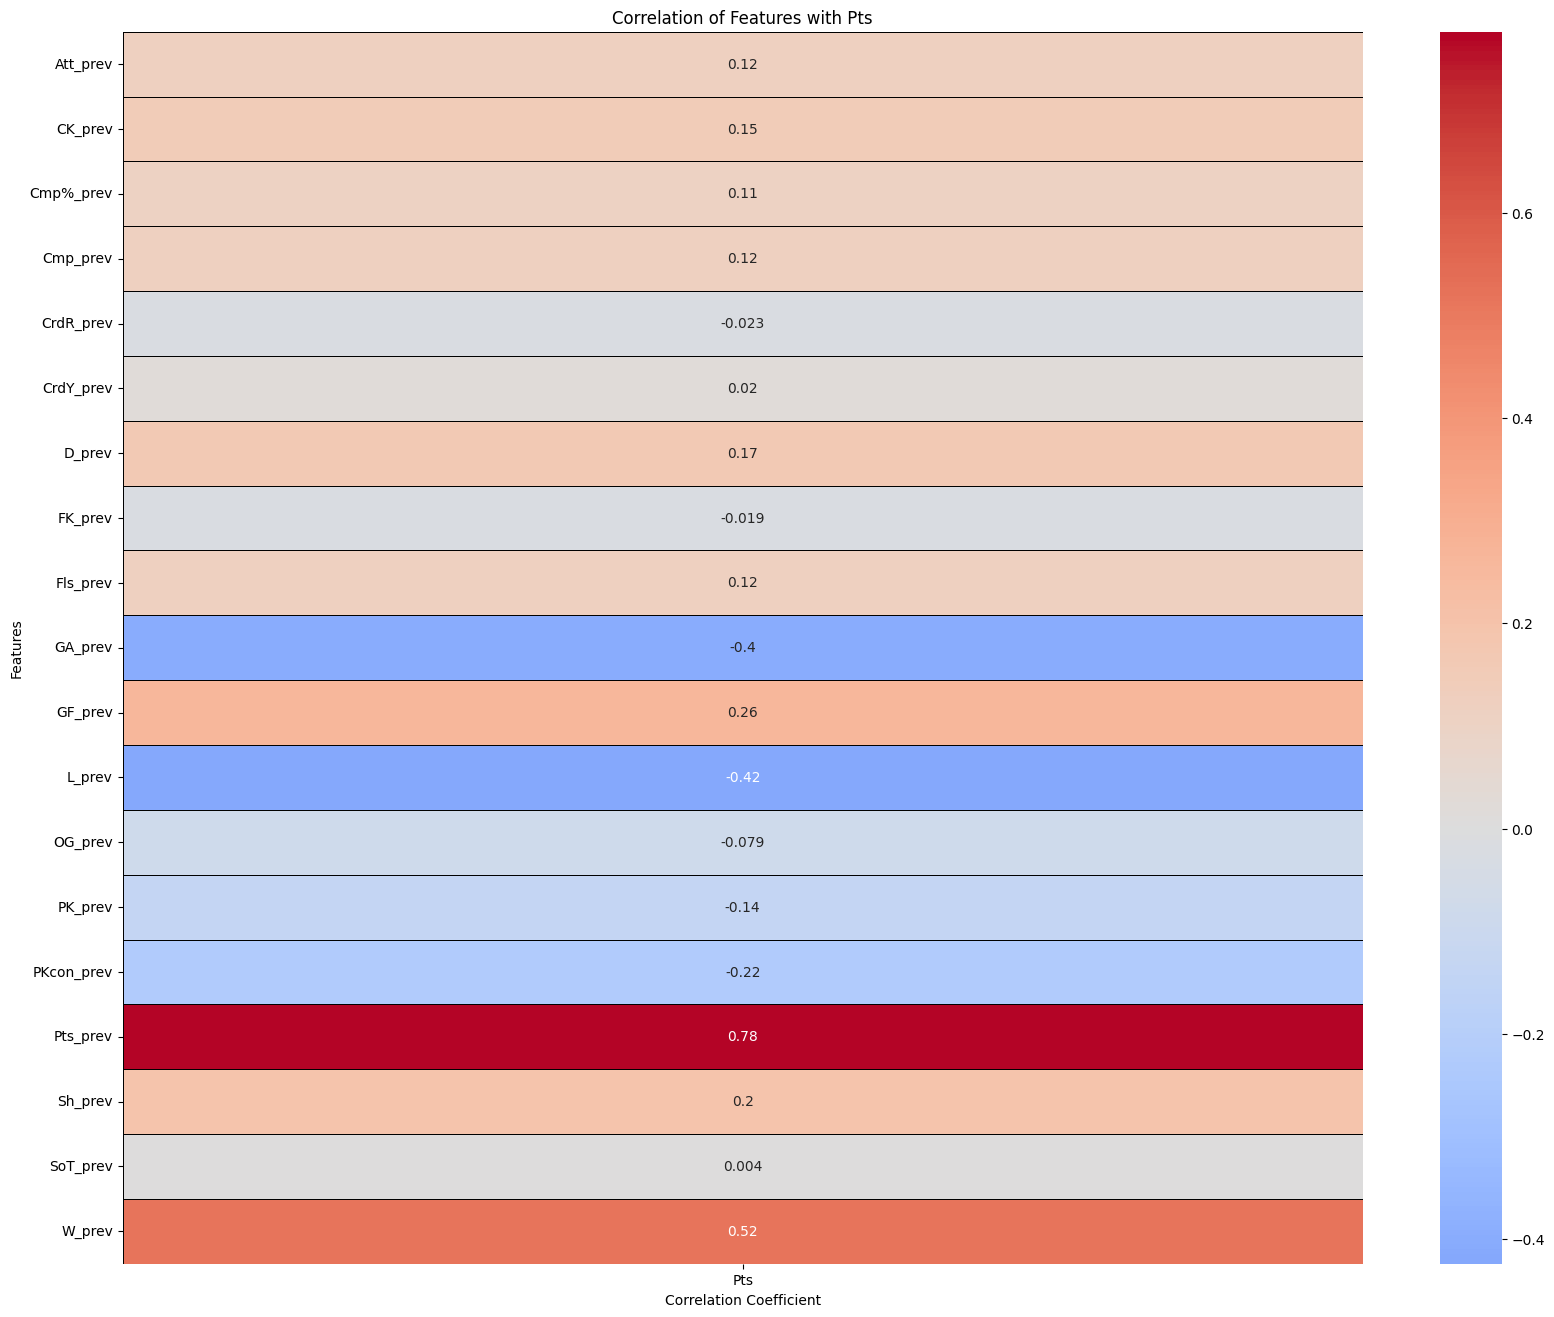

In [53]:
# Visualize the correlation matrix between just the features and target
plt.figure(figsize=(20, 16))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, cbar=True, linewidths=0.5, linecolor='black')
plt.title(f'Correlation of Features with {target_feature}')
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')
plt.show()

    - from the above diagram it seems like the _prev columns to include should be:
        - att, ck, cmp%, cmp, D, Fls, GA, GF, L, PK, PKcon, Pts, Sh, W

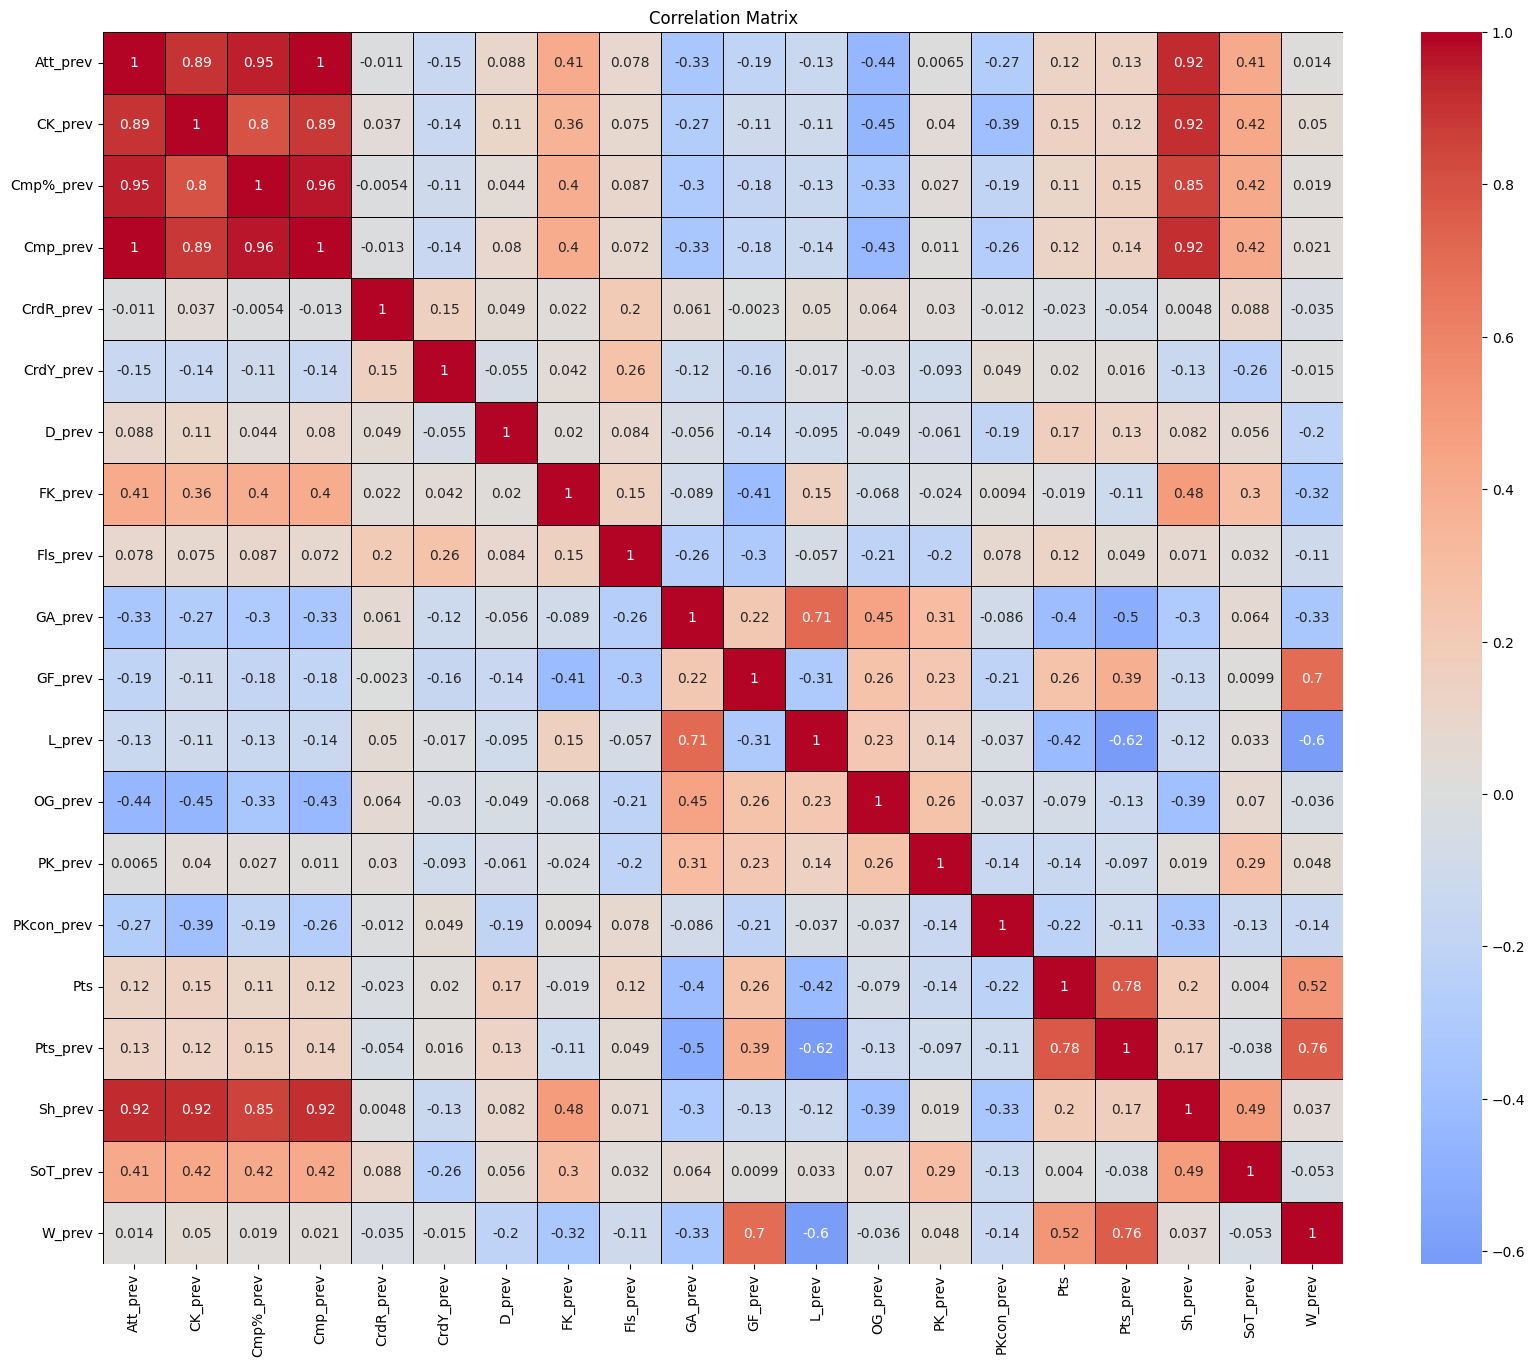

In [54]:
# Visualize the correlation matrix as a heatmap to check correlation between features
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

    - From the above diagram it seems like there are correlations between:
        - W_prev: Pts_prev --> Pts_prev
        - Att_prev: Sh_prev, cmp_prev, cmp%_prev, ck_prev --> sh_prev

    - Features to use should then be:
        -  D, Fls, GA,  PK, PKcon, Pts, Sh, L, GF,  CrdR_prev, CrdY_prev

In [59]:
seasonstats_merged_imputed.columns

Index(['Season', 'Squad', 'Att_prev', 'CK_prev', 'Cmp%_prev', 'Cmp_prev',
       'CrdR_prev', 'CrdY_prev', 'D_prev', 'FK_prev', 'Fls_prev', 'GA_prev',
       'GF_prev', 'L_prev', 'OG_prev', 'PK_prev', 'PKcon_prev', 'Pts',
       'Pts_prev', 'Sh_prev', 'SoT_prev', 'W_prev'],
      dtype='object')

In [60]:
col_to_drop = ['Att_prev', 'CK_prev', 'Cmp%_prev', 'Cmp_prev', 'FK_prev', 'GF_prev', 'OG_prev','SoT_prev', 'W_prev']

In [61]:
seasonstats_merged_imputed_dropped_col = seasonstats_merged_imputed.drop(columns = col_to_drop)

In [62]:
seasonstats_merged_imputed_dropped_col

,Season,Squad,CrdR_prev,CrdY_prev,D_prev,Fls_prev,GA_prev,L_prev,PK_prev,PKcon_prev,Pts,Pts_prev,Sh_prev
0,2023/2024,Manchester City,0.0,51.0,5.0,373.0,33.0,5.0,3.0,5.0,91.0,89.0,589.0
1,2023/2024,Arsenal,1.0,80.0,6.0,417.0,43.0,6.0,3.0,6.0,89.0,84.0,427.0
2,2023/2024,Liverpool,0.0,58.0,10.0,427.0,47.0,9.0,6.0,8.0,82.0,67.0,607.0
3,2023/2024,Aston Villa,3.0,82.0,7.0,446.0,46.0,13.0,1.0,4.0,68.0,61.0,423.0
4,2023/2024,Tottenham,2.0,81.0,6.0,396.0,63.0,14.0,3.0,6.0,66.0,60.0,426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,1888/1889,Everton,2.2,53.8,8.0,423.6,67.4,14.4,3.6,7.8,20.0,26.4,417.8
2559,1888/1889,Burnley,2.2,49.6,7.2,423.6,62.4,17.8,2.8,7.8,17.0,33.2,417.8
2560,1888/1889,Derby County,2.2,49.6,7.6,423.6,57.8,14.8,2.8,7.8,16.0,34.0,417.8
2561,1888/1889,Notts County,2.2,49.6,3.8,423.6,60.6,12.4,2.8,7.8,12.0,18.6,417.8


In [64]:
seasonstats_merged_imputed_dropped_col.to_csv(r'Data/seasonstats_key_features.csv')

Trying out VIF but not quite sure how to interpret these results

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
X = seasonstats_merged_imputed[numerical_cols]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
       Feature           VIF
0     Att_prev  15828.277257
1      CK_prev    793.938162
2    Cmp%_prev   2208.629930
3     Cmp_prev   7225.123470
4    CrdR_prev      7.020436
5    CrdY_prev     58.862772
6       D_prev     17.389368
7      FK_prev     68.487260
8     Fls_prev    199.795206
9      GA_prev    103.123223
10     GF_prev    101.024095
11      L_prev     62.971829
12     OG_prev     15.465689
13     PK_prev     12.585354
14  PKcon_prev     29.765085
15         Pts     36.027908
16    Pts_prev     92.046284
17     Sh_prev   1102.548106
18    SoT_prev    101.873029
19      W_prev    115.615862
